# Tight binding calculations
In this notebook I will do some calculations based on the tight binding model


### Short introduction 
The tight binding model is an approximation that makes it easier to calculate band structure for materials. 
For each atom in the lattice, we can write the atomic Hamiltonian as
$$
\begin{equation}
\hat H_{at} = \frac{-\hbar^2}{2m}\nabla^2 + \hat V_{at}(\mathbf r)
\end{equation}
$$
where $\hat V_{at}(\mathbf r)$ is the atomic potential, usually Cooulomb-potential
The time-independent Schrödinger-equation for a single atom is then 
$$
\begin{equation}
\left[\frac{-\hbar^2}{2m}\nabla^2 + \hat V_{at}(\mathbf r)\right]\varphi_{i}(\alpha, \mathbf r) = \varepsilon_{i}\varphi_{i}(\alpha, \mathbf r)
\end{equation}
$$
The full Hamiltonian of the lattice contains all the atomic potentials centered at positions $\mathbf R_{j}$:
$$
\begin{equation}
\hat H = \frac{-\hbar^2}{2m}\nabla^2 + \sum\limits_{j}\hat V_{at}(\mathbf r-\mathbf R_{j})
\end{equation}
$$
We are searching for the eigenfunctions of the full Hamiltonian, that satisfy the following equation:
$$
\begin{equation}
\left[\frac{-\hbar^2}{2m}\nabla^2 + \sum\limits_{j}\hat V_{at}(\mathbf r-\mathbf R_{j})\right]\psi_n(\mathbf r) = E_n \psi_n(\mathbf r)
\end{equation}
$$
We will solve these equations numerically using finite difference method.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# All Hamiltonians are hermitian and mostly tridiagonal
from scipy.linalg import eigh, eigh_tridiagonal

In [2]:
Xmax = 20.0 # Maximum of X range
nstep = 3072 # number of steps
x = np.linspace(0, Xmax, nstep)
b = x[1]-x[0]

hbar = 1.0
m = 1.0

a = 3. # the lattice constant
Rjs = np.array([a*(j+1/2) for j in range(int(Xmax//a))])
              
V0 = -100.0 # potential well depth
pw = 0.5 # half width of the potential well

kCoulomb = 1
q = 1.0
alpha = 0.25
Vmin = -100
Ratom = 0.5
def VCoulomb(x):
    if abs(x)<=Ratom/2.0:
        return Vmin
    return max(Vmin, -kCoulomb*q/np.abs(alpha*x))
VCoulomb = np.vectorize(VCoulomb)

def VWell(x):
    if np.abs(x) < pw:
        return V0
    else:
        return 0     
VWell = np.vectorize(VWell)


Vatom = VCoulomb
def Vpot(x):
    return np.sum([Vatom(x-Rj) for Rj in Rjs])
Vpot = np.vectorize(Vpot)

# Single potential well

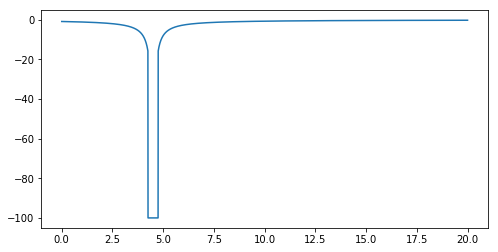

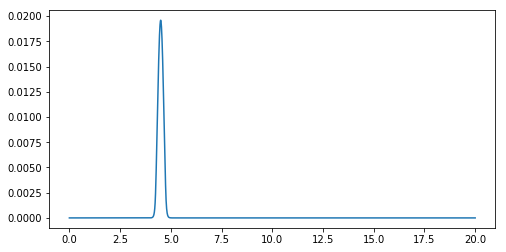

In [3]:
Mdd = 1./(b*b)*(np.diag(np.ones(nstep-1),-1) - 2*np.diag(np.ones(nstep),0) + np.diag(np.ones(nstep-1),+1))
x0 = 4.5
H1 = -hbar**2/(2.*m)*Mdd + np.diag(Vatom(x-x0))

w, v = np.linalg.eigh(H1)
psi = np.transpose(v)[0]

plt.figure(figsize=(8, 4))
plt.plot(x, Vatom(x-x0))
plt.figure(figsize=(8, 4))
plt.plot(x, psi**2)

# Double potential well

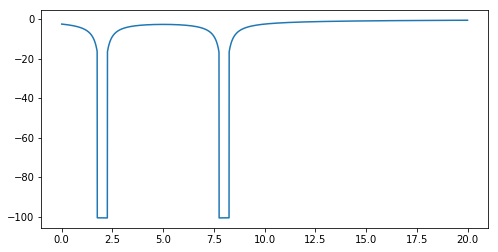

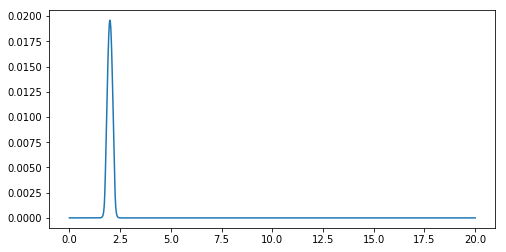

In [4]:
Mdd = 1./(b*b)*(np.diag(np.ones(nstep-1),-1) - 2*np.diag(np.ones(nstep),0) + np.diag(np.ones(nstep-1),+1))
x01 = 2.0
x02 = 8.0

H2 = -hbar**2/(2.*m)*Mdd + np.diag(Vatom(x-x01)) + np.diag(Vatom(x-x02))

w, v = np.linalg.eigh(H2)
psi = np.transpose(v)[0]

plt.figure(figsize=(8, 4))
plt.plot(x, Vatom(x-x01) + Vatom(x-x02))
plt.figure(figsize=(8, 4))
plt.plot(x, psi**2)

In [5]:
np.trapz(psi**2)

1.0000000000000002

# Triple potential well

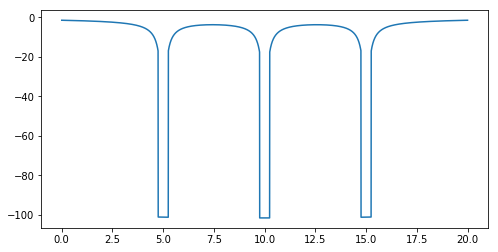

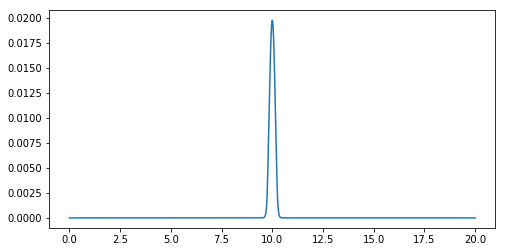

In [6]:
Mdd = 1./(b*b)*(np.diag(np.ones(nstep-1),-1) - 2*np.diag(np.ones(nstep),0) + np.diag(np.ones(nstep-1),+1))
x01 = 5.0
x02 = 10.0
x03 = 15.0

H3 = -hbar**2/(2.*m)*Mdd + np.diag(Vatom(x-x01)) + np.diag(Vatom(x-x02)) + np.diag(Vatom(x-x03))

w, v = np.linalg.eigh(H3)
psi = np.transpose(v)[0]

plt.figure(figsize=(8, 4))
plt.plot(x, Vatom(x-x01) + Vatom(x-x02) + Vatom(x-x03))
plt.figure(figsize=(8, 4))
plt.plot(x, psi**2)

# Full system 

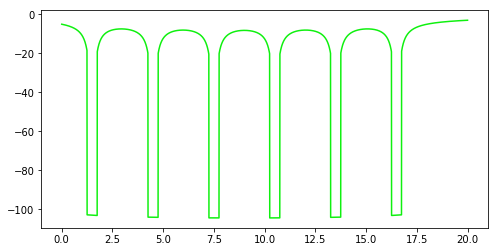

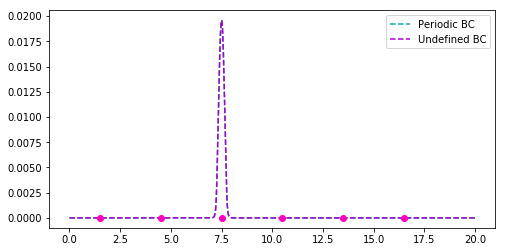

In [7]:
Mdd = 1./(b*b)*(np.diag(np.ones(nstep-1),-1) - 2*np.diag(np.ones(nstep),0) + np.diag(np.ones(nstep-1),+1))
Hfull = -hbar**2/(2.*m)*Mdd + np.diag(Vpot(x))

Hfull_periodic = np.copy(Hfull)
Hfull_periodic[Hfull.shape[0]-1, 0] = 1
Hfull_periodic[0, Hfull.shape[1]-1] = 1

wfull, vfull = np.linalg.eigh(Hfull) # vs are transposed !!!
psifull = np.transpose(vfull)[0]
Efull = wfull[0]

wfull_periodic, vfull_periodic = np.linalg.eigh(Hfull_periodic) # vs are transposed !!!
psifull_periodic = np.transpose(vfull_periodic)[0]
Efull_periodic = wfull_periodic[0]

plt.figure(figsize=(8,4))
plt.plot(x, Vpot(x), '-', color='#0ff00f')

plt.figure(figsize=(8,4))
plt.plot(x, psifull_periodic**2, '--', color="#0caaab", label="Periodic BC")
plt.plot(x, psifull**2, '--', color="#aa00cb", label="Undefined BC")

for Rj in Rjs:
    plt.plot(Rj,0, 'o', color='#ff00bb')

plt.legend()
# for Rj in [Rjs[1]]:
#     Hat = -hbar**2/(2.*m)*Mdd + np.diag(Vatom(x-Rj))
#     wj, vj = np.linalg.eig(Hat)
#     psij = np.transpose(vj)[0]
#     ax2.plot(x, psij**2, '-', color='red')
# ax2.set_ylim(bottom=min(psifull**2), top=max(psifull**2))

In [8]:
np.trapz(psifull**2)

0.9999999999999997

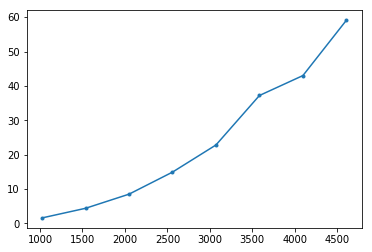

In [9]:
sizes = [1024, 1536, 2048, 2560, 3072, 3584, 4096, 4608]
times = [1.57, 4.37, 8.48, 14.9, 22.8, 37.2, 43, 59.1]
plt.plot(sizes, times, '.-')